<a href="https://colab.research.google.com/github/Mahdi-Golizadeh/my_tf_xp/blob/main/tf_multi_output_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

--2023-02-13 16:59:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76189 (74K) [application/x-httpd-php]
Saving to: ‘ENB2012_data.xlsx.1’

ENB2012_data.xlsx.1 100%[===================>]  74.40K  --.-KB/s    in 0.1s    

2023-02-13 16:59:19 (779 KB/s) - ‘ENB2012_data.xlsx.1’ saved [76189/76189]



In [36]:
df = pd.read_excel("/content/ENB2012_data.xlsx")

In [37]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [38]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [39]:
train, test = train_test_split(df, test_size= .1)

In [40]:
train_y_1 = train.pop("Y1")
train_y_2 = train.pop("Y2")
test_y_1 = test.pop("Y1")
test_y_2 = test.pop("Y2")

In [41]:
data_desc = train.describe()

In [42]:
train

,X1,X2,X3,X4,X5,X6,X7,X8
398,0.82,612.5,318.5,147.00,7.0,4,0.25,3
101,0.90,563.5,318.5,122.50,7.0,3,0.10,2
248,0.86,588.0,294.0,147.00,7.0,2,0.10,5
240,0.98,514.5,294.0,110.25,7.0,2,0.10,5
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2
...,...,...,...,...,...,...,...,...
52,0.90,563.5,318.5,122.50,7.0,2,0.10,1
618,0.64,784.0,343.0,220.50,3.5,4,0.40,2
465,0.69,735.0,294.0,220.50,3.5,3,0.25,4
70,0.76,661.5,416.5,122.50,7.0,4,0.10,1


In [43]:
train_y_1 = np.array(train_y_1)
train_y_2 = np.array(train_y_2)
test_y_1 = np.array(test_y_1)
test_y_2 = np.array(test_y_2)

In [44]:
data_desc.transpose()

,count,mean,std,min,25%,50%,75%,max
X1,691.0,0.764385,0.104449,0.62,0.69,0.76,0.82,0.98
X2,691.0,671.285818,87.314580,514.50,612.50,661.50,735.00,808.50
X3,691.0,319.244573,43.651530,245.00,294.00,318.50,343.00,416.50
X4,691.0,176.020622,44.922066,110.25,147.00,147.00,220.50,220.50
X5,691.0,5.282923,1.750958,3.50,3.50,7.00,7.00,7.00
X6,691.0,3.487699,1.114233,2.00,2.50,3.00,4.00,5.00
X7,691.0,0.233864,0.132848,0.00,0.10,0.25,0.40,0.40
X8,691.0,2.823444,1.542847,0.00,2.00,3.00,4.00,5.00


In [45]:
train_data_normal = (train - data_desc.transpose()["mean"]) / data_desc.transpose()["std"]
test_data_normal = (test - data_desc.transpose()["mean"]) / data_desc.transpose()["std"]

In [52]:
len(train.columns)

8

In [62]:
input_layer = tf.keras.layers.Input(shape= len(train.columns), name= "inp_1")
first_dense = tf.keras.layers.Dense(units= 64, 
                                    activation= tf.keras.activations.tanh, name= "dns_1")(input_layer)
second_dense = tf.keras.layers.Dense(units= 64, 
                                    activation= tf.keras.activations.tanh, name= "dns_2")(first_dense)

y_1_out = tf.keras.layers.Dense(units= 1, 
                                name= "y_1")(second_dense)

third_dense = tf.keras.layers.Dense(units= 32,
                                    activation= tf.keras.activations.tanh,
                                    name= "dns_3")(second_dense)

y_2_out = tf.keras.layers.Dense(units= 1, 
                                name= "y_2")(third_dense)

model = tf.keras.models.Model(
    inputs= input_layer,
    outputs= [y_1_out, y_2_out]
)

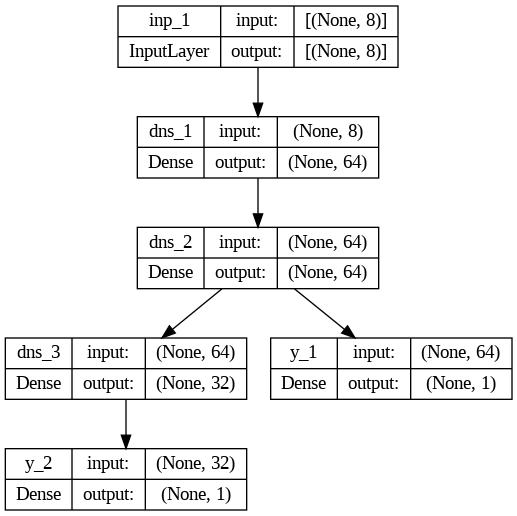

In [65]:
tf.keras.utils.plot_model(
    model, show_shapes= True, show_layer_names= True, to_file= "model.png"
)